In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "ocean_reef_data_india.csv"  # Update the path if needed
df = pd.read_csv("/Users/owlxshri/Desktop/coral reef/mlpr-project/finaldata/ocean_reef_data_india.csv")

In [ ]:
print("Dataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20664 entries, 0 to 20663
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       20664 non-null  int64  
 1   Month      20664 non-null  int64  
 2   Day        20664 non-null  int64  
 3   Latitude   20664 non-null  float64
 4   Longitude  20664 non-null  float64
 5   pH_total   20664 non-null  float64
 6   Salinity   20664 non-null  float64
 7   pCO2       20664 non-null  float64
 8   fCO2       20664 non-null  float64
 9   Reef Name  20664 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB

Missing Values:
 Year         0
Month        0
Day          0
Latitude     0
Longitude    0
pH_total     0
Salinity     0
pCO2         0
fCO2         0
Reef Name    0
dtype: int64


In [8]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Year         Month           Day      Latitude     Longitude  \
count  20664.000000  20664.000000  20664.000000  20664.000000  20664.000000   
mean    2005.000000      6.500000      1.243902     10.833333     80.642857   
std       11.832446      3.452136      0.429445      2.705146      9.797155   
min     1985.000000      1.000000      1.000000      6.500000     68.500000   
25%     1995.000000      3.750000      1.000000      8.500000     72.500000   
50%     2005.000000      6.500000      1.000000     10.500000     74.500000   
75%     2015.000000      9.250000      1.000000     12.500000     92.500000   
max     2025.000000     12.000000      2.000000     22.500000     93.500000   

           pH_total      Salinity          pCO2          fCO2  
count  20664.000000  20664.000000  20664.000000  20664.000000  
mean       8.069942     34.271625    370.515764    369.384758  
std        0.019474      1.292783     23.326741     23.258338  
min       

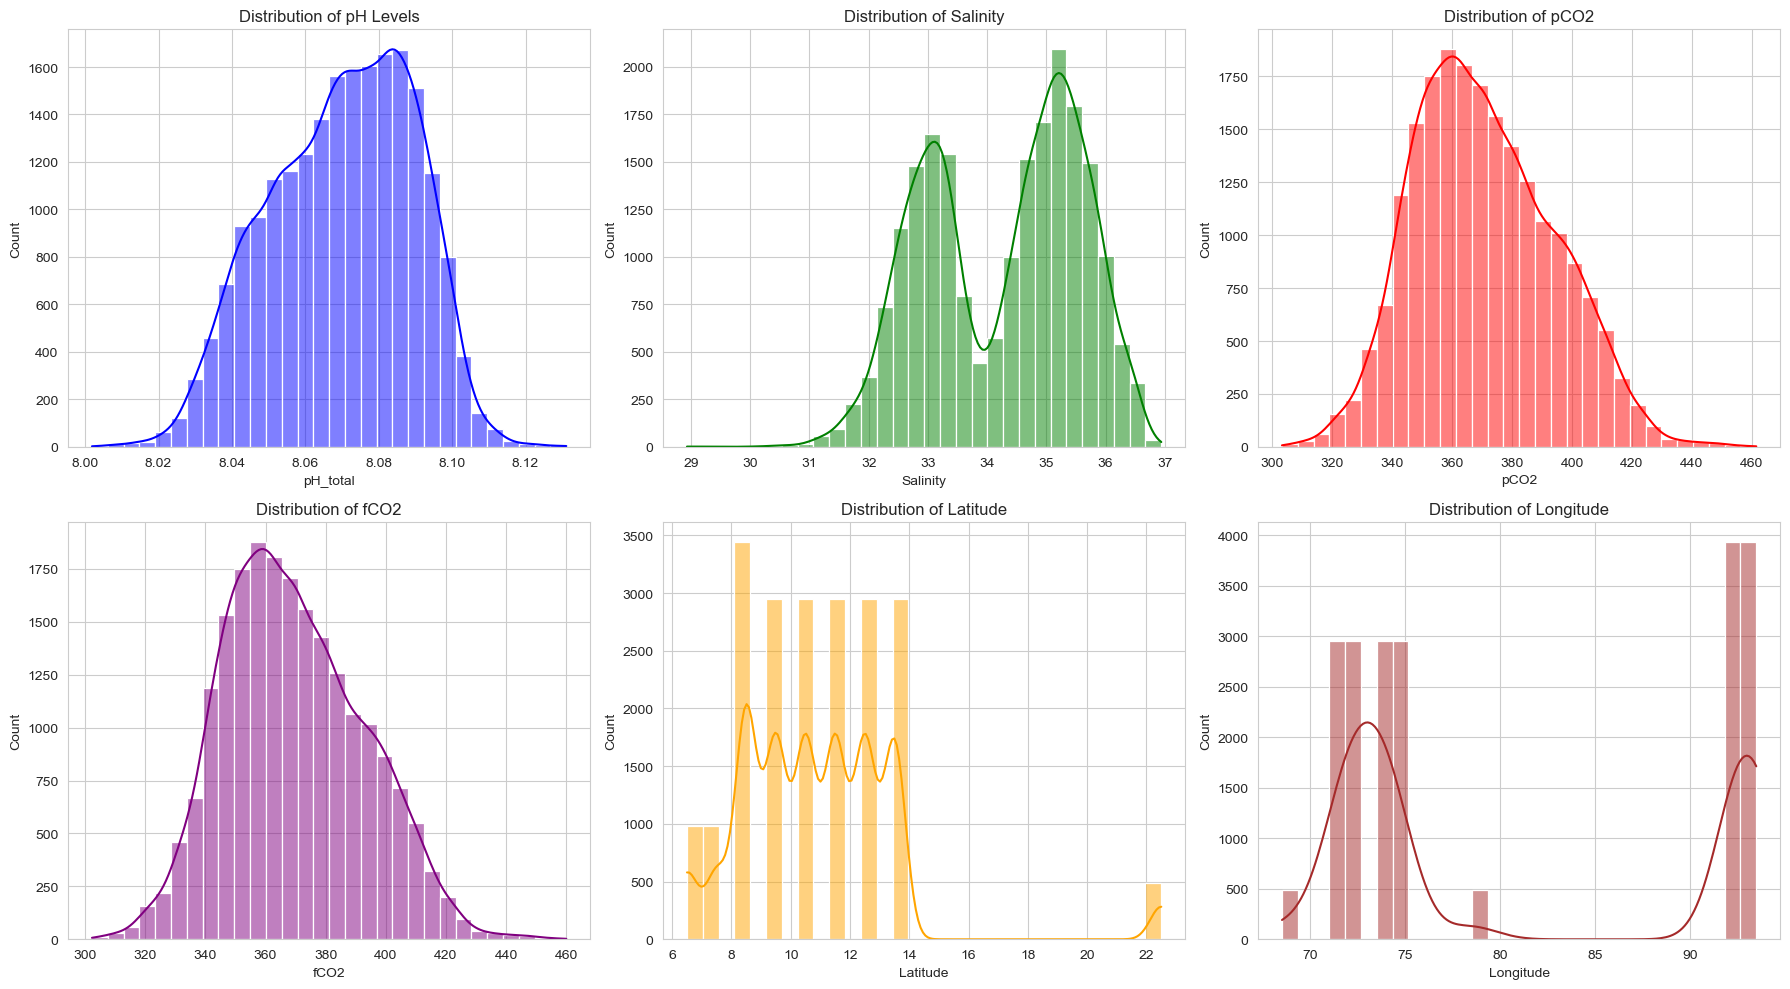

In [9]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(df["pH_total"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of pH Levels")

sns.histplot(df["Salinity"], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Salinity")

sns.histplot(df["pCO2"], bins=30, kde=True, ax=axes[0, 2], color="red")
axes[0, 2].set_title("Distribution of pCO2")

sns.histplot(df["fCO2"], bins=30, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution of fCO2")

sns.histplot(df["Latitude"], bins=30, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of Latitude")

sns.histplot(df["Longitude"], bins=30, kde=True, ax=axes[1, 2], color="brown")
axes[1, 2].set_title("Distribution of Longitude")

plt.tight_layout()
plt.show()


/var/folders/rh/12qqnf0d5871pn0c7924tqwc0000gn/T/ipykernel_79140/986177450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


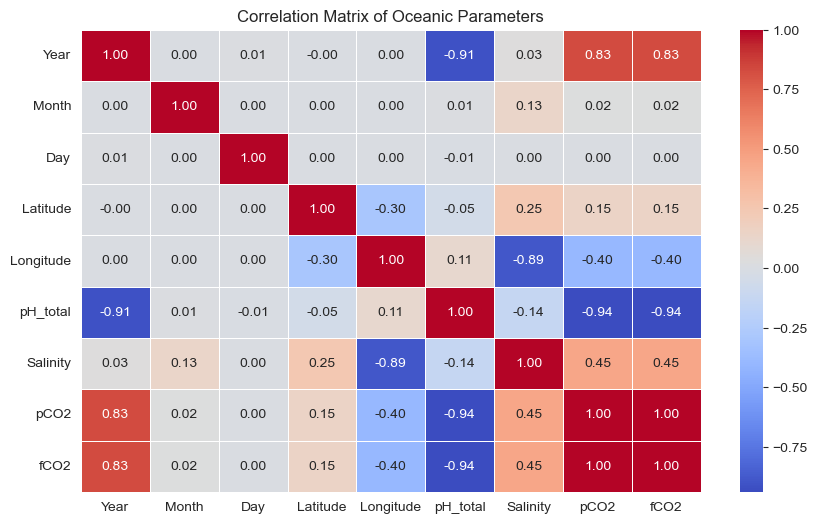

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Oceanic Parameters")
plt.show()

/var/folders/rh/12qqnf0d5871pn0c7924tqwc0000gn/T/ipykernel_79140/2492446692.py:20: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


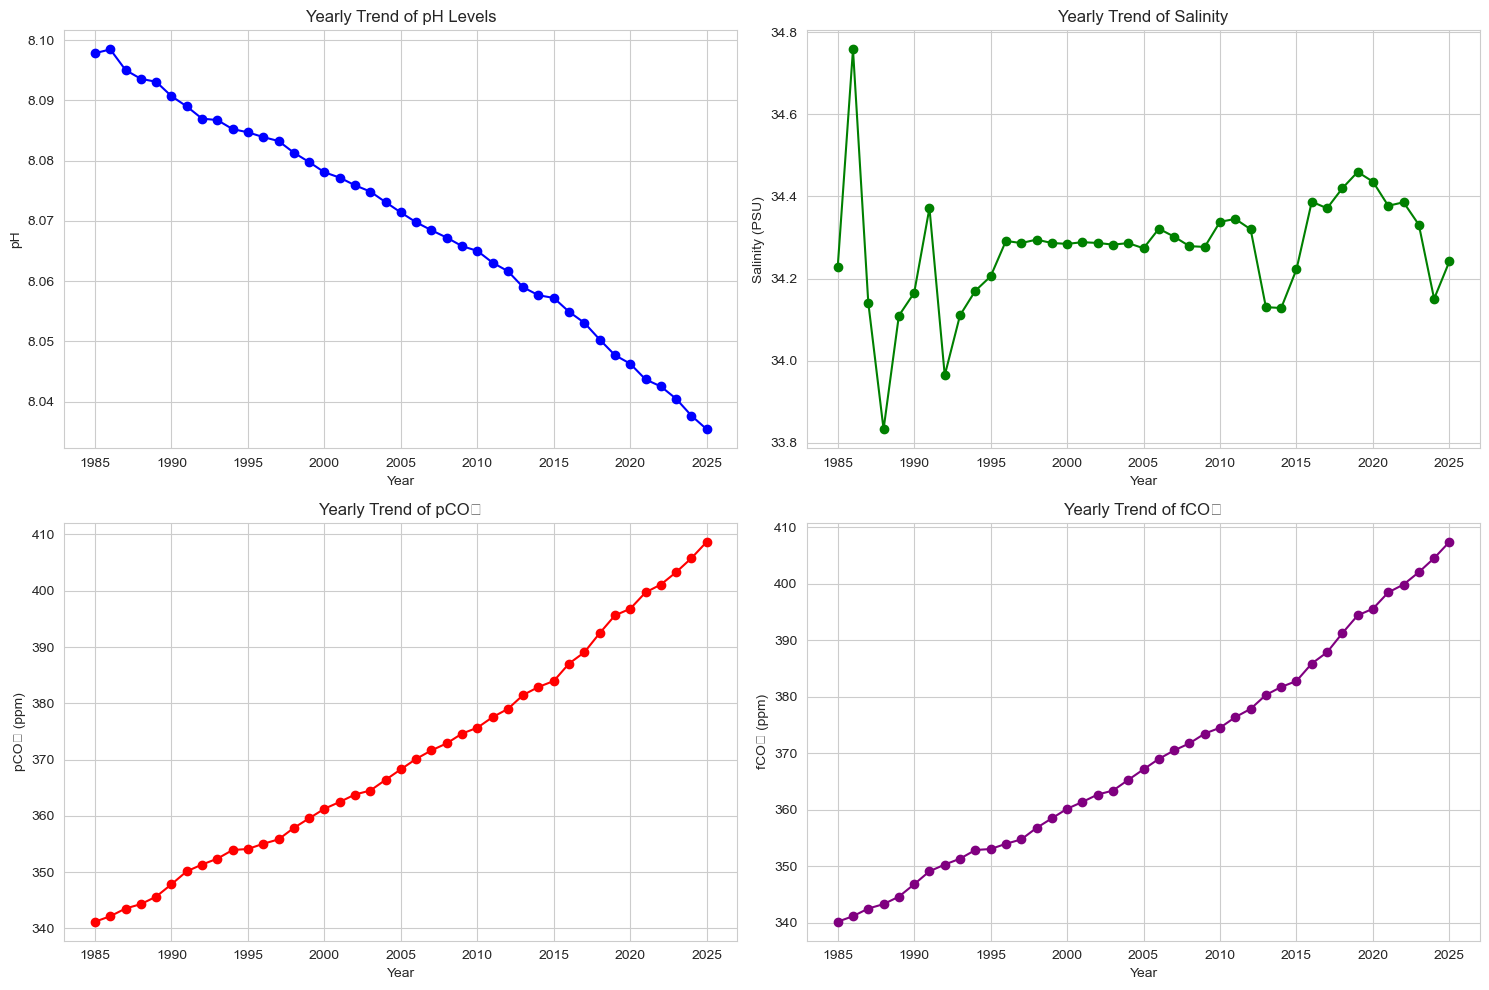

In [11]:
df_yearly = df.groupby("Year")[["pH_total", "Salinity", "pCO2", "fCO2"]].mean()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_yearly["pH_total"].plot(ax=axes[0, 0], color="blue", marker="o", linestyle="-")
axes[0, 0].set_title("Yearly Trend of pH Levels")
axes[0, 0].set_ylabel("pH")

df_yearly["Salinity"].plot(ax=axes[0, 1], color="green", marker="o", linestyle="-")
axes[0, 1].set_title("Yearly Trend of Salinity")
axes[0, 1].set_ylabel("Salinity (PSU)")

df_yearly["pCO2"].plot(ax=axes[1, 0], color="red", marker="o", linestyle="-")
axes[1, 0].set_title("Yearly Trend of pCO₂")
axes[1, 0].set_ylabel("pCO₂ (ppm)")

df_yearly["fCO2"].plot(ax=axes[1, 1], color="purple", marker="o", linestyle="-")
axes[1, 1].set_title("Yearly Trend of fCO₂")
axes[1, 1].set_ylabel("fCO₂ (ppm)")

plt.tight_layout()
plt.show()

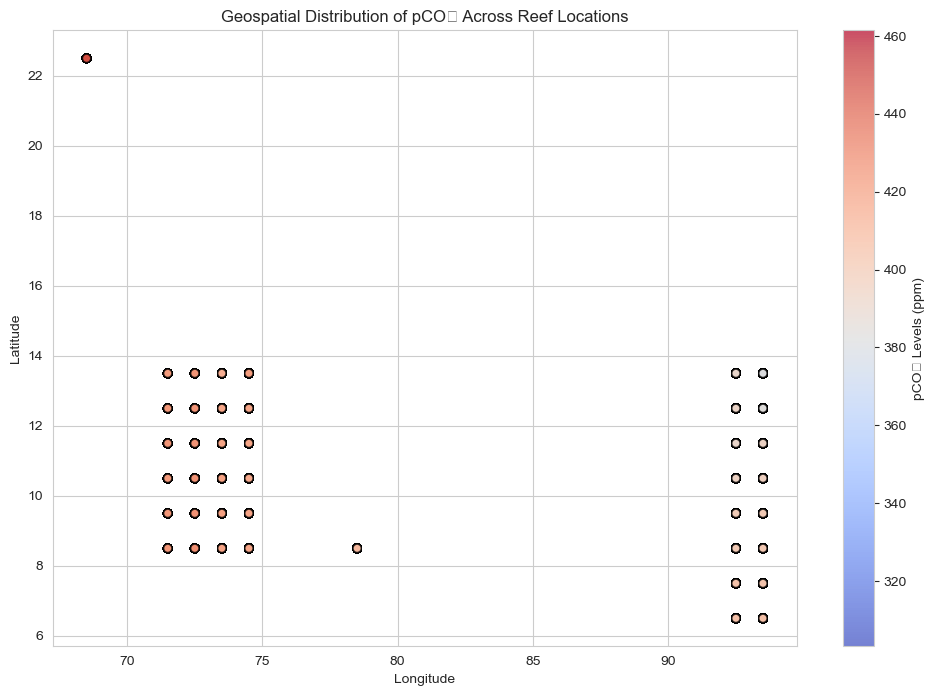

In [12]:
plt.figure(figsize=(12, 8))
sc = plt.scatter(df["Longitude"], df["Latitude"], c=df["pCO2"], cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.colorbar(sc, label="pCO₂ Levels (ppm)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Distribution of pCO₂ Across Reef Locations")
plt.show()